**Linear Regression Model **


*Section 1: Basics of LR * <br>
Build models that predict the final sale price from other attributs.<br>
Which properties of a house most affect the final sale price? <br>
How effectively can we predict the sale price from just its properties? <br>


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('AmesHousing-1.txt', delimiter='\t')
train = data[0:1460]
test = data[1460:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

Simple Linear Regression: $\hat{y} = a_1x_1 + a_0$

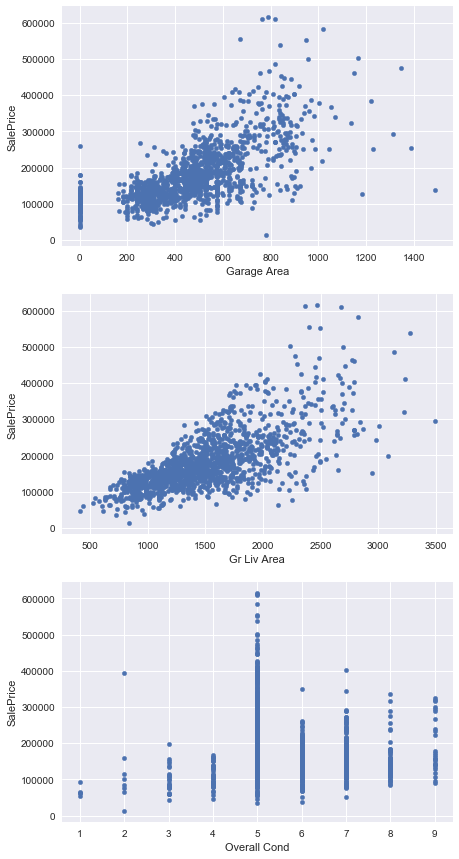

In [6]:
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

Obsrvation: Gr Liv Area vs Price feature correlates the most and confirm using correlation b/w pairs.<br>

In [7]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


Correlation b/w Gr Liv Area and Price which is Highest ( Stronger is 1 ). <br>
$ \hat{y} = a_1*Gr \ Liv \ Area + a_0 $ <br>

residual sum of squares (RSS): <br>

$RSS = (y_1 - \hat{y_1})^2 +  (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2$ <br>

$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $ <br>
This looks similar to find MSE:  $ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $ <br>

Goal is minimize the RSS.

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056043


Univariant LR model b/w Gr Liv Area and SalePrice: $ \hat{y} = 116.86624683x_1 + 5366.82171006 $ <br>

Let's find the RMSE value for test and train.<br>

In [15]:

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


Multivariate LR uses multiple feature: $\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$ <br>
Challenges: selecting relevant features ( Overall Cond and Gr Liv Area )
find RMSE for train and test.<br>

In [16]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559


*Section 2: Feature Selection * <br>

In [27]:
#Keep only the col's no missing values:
data = pd.read_csv('AmesHousing-1.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


In [28]:
len(full_cols_series)

25

So,25 * 25 = 625. Its hard to correlates.<br> Use Heat map ( if > 0.3 value )<br>

Ref: http://seaborn.pydata.org/examples/heatmap_annotation.html

In [31]:
#Correlate w r t SalePrice
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


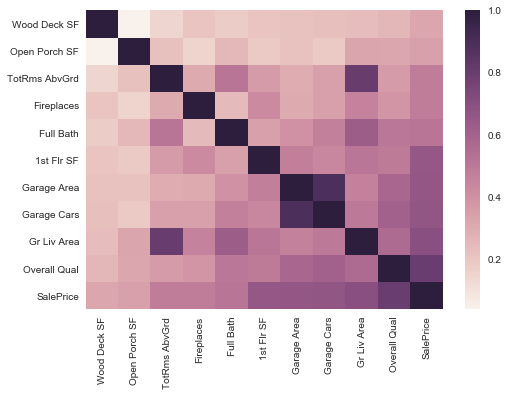

In [36]:
# find the strong correlation:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)
plt.show()

Observation: Following are strongly correlated.<br>
Gr Liv Area and TotRms AbvGrd <br>
Garage Area and Garage Cars <br>

Gr Liv Area and Garage Area refelcts very similar info.<br>


In [40]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [41]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185851
41032.026120197654


Last tech, remove features with low variance: <br>
Rescale all of the col's to vary b/w 0 and 1 using Min-Max scaling or rescaling. <br>
$\frac{x - min(x)} {max(x) - min(x)}$ <br>

x is individual value.<br>
min(x) is min value for the col x. <br>
max(x) is max value for the col x. <br>

In [44]:
unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())
print(unit_train.min())
print(unit_train.max())

print('------')
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)



Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64
------
Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


Let's set cut off variance of *0.015*, remove the **Open Porch SF** feature, and train and test a model using the remaining features.

In [45]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.42702437716


Able to improve the RMSE value to approx *40591* by removing the **Open Porch SF** feature. <br>
In Next, see the different ways of fitting models.<br>

** Section 3: Gradient Descent ** <br>
Above tech won't work for multiple features. because, if minimizing one parameter may vary to another parameter.So, Gradient Descent tech;<br>

The gradient descent algorithm works by iteratively trying different parameter values until the model with the lowest mean squared error is found. Gradient descent is a commonly used optimization technique for other models as well, like neural networks.<br>

Overview:

select initial value for the parameter: a1
repeat until convergence (usaually implemented with a max no. of iterations ): <br>
    calculate the error (MSE) of model that uses current parameter value: $ MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)} ) ^2 $ <br>
    calculate the derivative of the error (MSE) at the current parameter value: $ \frac{d}{da_1} MSE(a_1) $
    update the parameter value by subtracting the derivative times a constant ( $ \alpha $, called learning rate): $ a_1 := a_1 - \alpha \frac{d}{da_1} MSE(a_1) $ <br>
    
Selecting an appropriate initial parameter and learning rate will reduce the number of iterations required to converge, and is part of hyperparameter optimization. <br>

how to calculate the derivative of the error function at each iteration of the algorithm. <br>

Ref: https://en.wikipedia.org/wiki/Gradient_descent

In mathematical optimization, a function that we optimize through minimization is known as a cost function or sometime as the loss function. Because we're trying to fit a single parameter model, we can replace with with in the cost function:<br>
$ MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (a_1x_1^{(i)} - y^{(i)} ) ^2 $ <br>

differetiate both sides.<br>

$ \frac{d}{da_1} MSE(a_1) = \frac{d}{da_1} \frac{1}{n} \sum_{i=1}^{n} (a_1x_1^{(i)} - y^{(i)} ) ^2 $ <br>

Apply Linearity of differentiation property from calculus. <br>
$ \frac{d}{da_1} MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} \frac{d}{da_1} (a_1x_1^{(i)} - y^{(i)} ) ^2 $ <br>
Use chain rule. <br>

$ \frac{d}{da_1} MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} 2(a_1x_1^{(i)} - y^{(i)})  \frac{d}{da_1} (a_1x_1^{(i)} - y^{(i)} ) $ <br>

differentiating $a_1x_1^{(i)} - y^{(i)}$ w r t a1, where $y^{(i)}$ and $x_1^{(i)}$ as constants. <br>
$ \frac{d}{da_1} (a_1x_1^{(i)} - y^{(i)}) $ then simplies to just $x_1^{(i)}$: <br>

$ \frac{d}{da_1} MSE(a_1) = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}(a_1x_1^{(i)} - y^{(i)}) $ <br>

For every iteration of gradient descent: <br>
    this derivative is computed using the current value.<br>
    the derivative is multiplied by the learning rate $ \alpha: $ $\alpha \frac{d}{da_1} MSE(a_1)$ <br>
    the result is subtracted from the current parameter value and assigned as the new parameter value: $ a_1 := a_1 - \alpha \frac{d}{da_1} MSE(a_1) $ <br>
    
    
a1_list = [1000] <br>
alpha = 10 <br>

for x in range(0, 10): <br>
    a1 = a1_list[x]    
    deriv = derivative(a1, alpha, xi_list, yi_list) <br>
    a1_new = a1 - alpha*deriv <br>
    a1_list.append(a1_new)  <br>
 
 

Ref:
https://en.wikipedia.org/wiki/Loss_function <br>
https://en.wikipedia.org/wiki/Linearity_of_differentiation <br>
https://en.wikipedia.org/wiki/Chain_rule <br>
https://www.khanacademy.org/math/calculus-home/taking-derivatives-calc/chain-rule-calc/v/differentiating-powers-of-functions <br>

In [47]:
def derivative(a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv



def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)


param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]

final_param

120.14219147202738

This is how, single parameter gradient descent works and Let's build for multi variant LR.<br>

Goal: reduce residual sum of squares (RSS ) and the mean squared error (MSE). <br>
The gradient is a multi variable generalization of the derivative. <br>

$ MSE(a_1) = \frac{1}{n} \sum_{i=1}^{n} (a_1x_1^{(i)} - y^{(i)} ) ^2 $ <br>

There are 2 parameter values a0 and a1, the cost function is now function of 2 variables, not 1: <br>

$ MSE(a_0, a_1) = \frac{1}{n} \sum_{i=1}^{n} (a_0 + a_1x_1^{(i)} - y^{(i)} ) ^2 $ <br>

Instead of one update rule, now need two update rule: <br>

$ a_0 := a_0 - \alpha \frac{d}{da_0} MSE(a_0, a_1) $ <br>

$ a_1 := a_1 - \alpha \frac{d}{da_1} MSE(a_0, a_1) $ <br>

$ frac{d}{da_1} MSE(a_0, a_1) = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}(a_0 + a_1x_1^{(i)} - y^{(i)}) $ <br>


Ref: https://en.wikipedia.org/wiki/Gradient

In [48]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += a0 + a1*xi_list[i] - yi_list[i]
    deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)


a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)
print(a0_params)
print(a1_params)




[1000, 999.9729797812329, 999.985903701066, 999.980232547139, 999.9832179015052, 999.9821734177915, 999.983004932363, 999.9829631191217, 999.9833278635107, 999.98350334434, 999.9837669324418, 999.9839895042135, 999.9842311701743, 999.9844639472566, 999.9847008623329, 999.9849358510428, 999.9851717365096, 999.9854072044933, 999.985642866808, 999.9858784386378, 999.986114052572]
[150, 105.34801721547944, 126.13471917628125, 116.45794862200977, 120.96274606972909, 118.86564116059868, 119.84189984026605, 119.38742488614261, 119.59899502291616, 119.50050320781361, 119.54635359313434, 119.52500879150305, 119.53494516153384, 119.53031930255781, 119.53247255390217, 119.53146994657168, 119.53193647656232, 119.53171908350993, 119.53182007507831, 119.53177285001942, 119.53179462379771]


if many parameter, $ a_0 := a_0 - \alpha \frac{d}{da_0} MSE \\
 a_1 := a_1 - \alpha \frac{d}{da_1} MSE \\ 
 a_2 := a_2 - \alpha \frac{d}{da_2} MSE \\ 
 a_3 := a_3 - \alpha \frac{d}{da_3} MSE \\ 
 a_n := a_n - \alpha \frac{d}{da_n} MSE \\
 $
  <br>
  
  
  $ \frac{d}{da_1} MSE = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}(\hat{y}^{(i)} - y^{(i)}) \\  
 \frac{d}{da_2} MSE = \frac{2}{n} \sum_{i=1}^{n} x_2^{(i)}(\hat{y}^{(i)} - y^{(i)}) \\
 \frac{d}{da_n} MSE = \frac{2}{n} \sum_{i=1}^{n} x_n^{(i)}(\hat{y}^{(i)} - y^{(i)})  \\ $ <br>
 
 the main challenges are: <br>
 
    choosing good initial parameter values <br>
    choosing a good learning rate (falls under the domain of hyperparameter optimization) <br>


** Section 4: Ordinary Least Squares **<br>
    
In Gradient descent algorithms, requires multiple iterations to converge on optimal parameter values and no. of iterations is hightly dependent on the intial values and the learning rate. <br>

Cost function in matrx form: <br>
 $ J(a) = \dfrac{1}{n} (Xa - y)^T(Xa - y) $ <br>
 $ \frac{dJ(a)}{da} = 2X^TXa - 2X^Ty $ <br>
 
To find *a* that minimize the cost function J(a), set the derivative equal to 0 and solve for a: <br>
$ 2X^TXa - 2X^Ty = 0 $ <br>
$ X^TXa = X^Ty $ <br>

$ a = (X^TX)^{-1}X^Ty $ <br>

Ref: https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/

In [49]:
features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']
X = train[features]
y = train['SalePrice']

first_term = np.linalg.inv(
        np.dot(
            np.transpose(X), 
            X
        )
    )
second_term = np.dot(
        np.transpose(X),
        y
    )
a = np.dot(first_term, second_term)
print(a)

[   53.75693376 18232.3137575  -6434.65300989    22.53151963
    86.81522574    28.08976713 11397.64135314]


** Section 4: Processing and Transforming Features ** <br>
The process of processing and creating new features is known as feature engineering. <br>
This is an art and having knowledge in the specific domain. <br>


In [51]:
train_null_counts = train.isnull().sum()
print(train_null_counts)
df_no_mv = train[train_null_counts[train_null_counts==0].index]

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       249
Lot Area             0
Street               0
Alley             1351
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        11
Mas Vnr Area        11
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu       717
Garage Type         74
Garage Yr Blt       75
Garage Finish       75
Garage Cars          0
Garage Area          0
Garage Qual

Observation: Some of the col's are in strings type. If these col's contain only a limited set of unique values, known as *Categorical features*.

In [52]:
 train['Utilities'].value_counts()

AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [53]:
train['Street'].value_counts()

Pave    1455
Grvl       5
Name: Street, dtype: int64

In [54]:
train['House Style'].value_counts()

1Story    743
2Story    440
1.5Fin    160
SLvl       60
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
Name: House Style, dtype: int64

In [57]:
#transform them to numerical form:
text_cols = df_no_mv.select_dtypes(include=['object']).columns
for col in text_cols:
    print(col+":", len(train[col].unique()))
for col in text_cols:
    train[col] = train[col].astype('category')
train['Utilities'].cat.codes.value_counts()


MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


0    1457
2       2
1       1
dtype: int64

In [58]:
#Use dummy coding.
#Ref: https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29

dummy_cols = pd.DataFrame()
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]

In [59]:
train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,ConLI,ConLw,New,Oth,WD,Abnorml,Alloca,Family,Normal,Partial
0,1,526301100,20,141.0,31770,NaN,6,5,1960,1960,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80.0,11622,NaN,5,6,1961,1961,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81.0,14267,NaN,6,6,1958,1958,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93.0,11160,NaN,7,5,1968,1968,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74.0,13830,NaN,5,5,1997,1998,...,0,0,0,0,1,0,0,0,1,0


In [61]:
train[['Year Remod/Add', 'Year Built']].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


In [62]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

In [63]:
train_null_counts = train.isnull().sum()
df_missing_values = train[train_null_counts[(train_null_counts>0) & (train_null_counts<584)].index]

print(df_missing_values.isnull().sum())
print(df_missing_values.dtypes)

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64
Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object


In [64]:
float_cols = df_missing_values.select_dtypes(include=['float'])
float_cols = float_cols.fillna(float_cols.mean())
print(float_cols.isnull().sum())

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64


Ref:
https://medium.com/ai-society/hello-gradient-descent-ef74434bdfa5